 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [142]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [147]:
# Reading whale returns
whale_csv_path = Path("Resources/whale_returns.csv")
whale_csv_data = pd.read_csv(whale_csv_path)
whale_csv_data.set_index(pd.to_datetime(whale_csv_data['Date'], infer_datetime_format=True), inplace=True)
whale_csv_data.drop(columns = ['Date'], inplace = True)
whale_csv_data.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-09,-0.005657,-0.004396,-0.006536,-0.002497
2017-02-01,-0.001477,0.012120,-0.007518,-0.001228
2018-01-02,0.014546,0.015045,-0.004784,0.031017
2017-04-27,0.002225,0.004637,-0.001710,0.000822
2015-12-11,-0.015554,-0.008345,-0.017981,-0.034280


In [148]:
# Count nulls
whale_csv_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [149]:
# Drop nulls
whale_csv_data = whale_csv_data.dropna().copy()
whale_csv_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [150]:
whale_csv_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [151]:
# Reading algorithmic returns
algo_csv_path = Path("Resources/algo_returns.csv")
algo_csv_data = pd.read_csv(algo_csv_path)
algo_csv_data.set_index(pd.to_datetime(algo_csv_data['Date'], infer_datetime_format=True), inplace=True)
algo_csv_data.drop(columns = ['Date'], inplace = True)
algo_csv_data.sample(5)

,Algo 1,Algo 2
Date,,
2015-08-18,-0.005919,-0.003776
2017-05-05,0.007084,0.005394
2016-01-04,-0.000307,-0.014485
2016-08-23,0.002701,0.006241
2017-07-31,-0.002221,-0.002616


In [152]:
# Count nulls
algo_csv_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [153]:
# Drop nulls
algo_csv_data = algo_csv_data.dropna().copy()
algo_csv_data

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [154]:
algo_csv_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [155]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path("Resources/sp500_history.csv")
sp500_csv_data = pd.read_csv(sp500_csv_path)
sp500_csv_data.set_index(pd.to_datetime(sp500_csv_data['Date'], infer_datetime_format=True), inplace=True)
sp500_csv_data.drop(columns = ['Date'], inplace = True)
sp500_csv_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [156]:
# Check Data Types
sp500_csv_data.dtypes

Close    object
dtype: object

In [157]:
# Fix Data Types
#cleanse data by taking out the '$' symbol
sp500_csv_data["Close"] = sp500_csv_data["Close"].str.replace("$", "")
sp500_csv_data["Close"]


/var/folders/g1/p_3g967x4c7dx51dnj06wb600000gn/T/ipykernel_21277/646602745.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_csv_data["Close"] = sp500_csv_data["Close"].str.replace("$", "")


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [158]:

#then change 'Close' to a float
sp500_csv_data["Close"] = sp500_csv_data["Close"].astype("float")
sp500_csv_data.dtypes

Close    float64
dtype: object

In [159]:
# Calculate Daily Returns
# daily_returns = sp500_csv_data.pct_change()
# daily_returns.head()

daily_returns = (sp500_csv_data - sp500_csv_data.shift(1)) / sp500_csv_data.shift(1)
daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [160]:
# Drop nulls
# sp500_csv_data = sp500_csv_data.dropna().copy()
# sp500_csv_data

daily_returns = daily_returns.dropna().copy()
daily_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [161]:
daily_returns.isnull().sum()

Close    0
dtype: int64

In [162]:
# Rename `Close` Column to be specific to this portfolio.
# sp500_csv_data.rename(columns = {"Close":"SP500 Close"}, inplace = True)
# sp500_csv_data

daily_returns.rename(columns = {"Close":"SP500 Close"}, inplace = True)
daily_returns

,SP500 Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [163]:
# Set the date as the index to the DataFrame
daily_returns.index

DatetimeIndex(['2019-04-22', '2019-04-18', '2019-04-17', '2019-04-16',
               '2019-04-15', '2019-04-12', '2019-04-11', '2019-04-10',
               '2019-04-09', '2019-04-08',
               ...
               '2012-10-12', '2012-10-11', '2012-10-10', '2012-10-09',
               '2012-10-08', '2012-10-05', '2012-10-04', '2012-10-03',
               '2012-10-02', '2012-10-01'],
              dtype='datetime64[ns]', name='Date', length=1648, freq=None)

In [164]:
whale_csv_data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [165]:
algo_csv_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [166]:
daily_returns.head()

,SP500 Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [167]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_rows = pd.concat([whale_csv_data, algo_csv_data, daily_returns], axis="columns", join="inner")
joined_data_rows

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

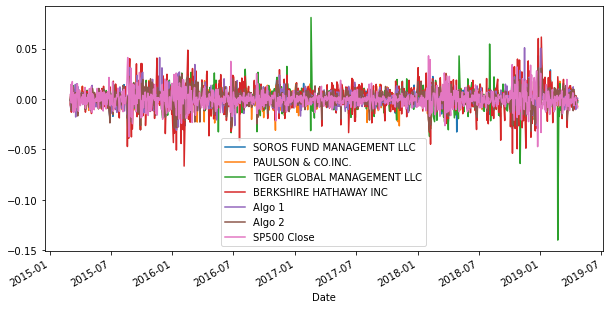

In [168]:
# Plot daily returns of all portfolios
joined_data_rows.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

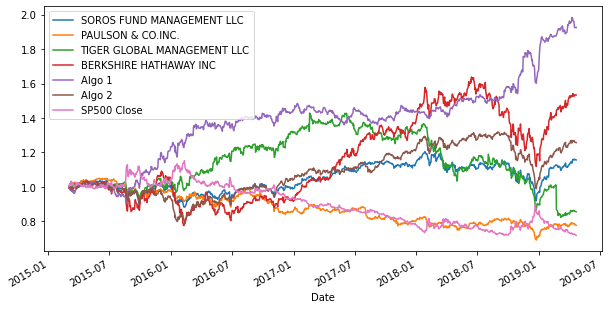

In [169]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_rows).cumprod()
#cumulative_returns
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

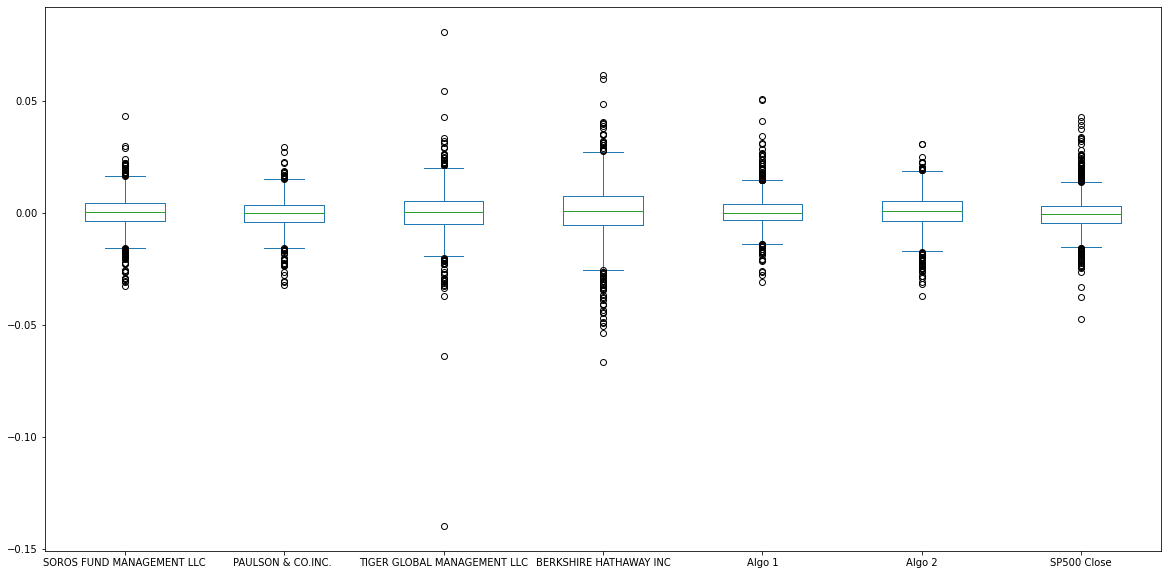

In [170]:
# Box plot to visually show risk
#
#joined_data_rows.plot.box(figsize=(20,10))
joined_data_rows.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [171]:
# Calculate the daily standard deviations of all portfolios
std_dev = joined_data_rows.std()
std_dev

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500 Close                    0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [172]:
# Calculate  the daily standard deviation of S&P 500
sp500_std_dev = daily_returns.std()
sp500_std_dev
# Determine which portfolios are riskier than the S&P 500
#compare the std dev vs the s&P

SP500 Close    0.008135
dtype: float64

### Calculate the Annualized Standard Deviation

In [173]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_dev = joined_data_rows.std() * np.sqrt(252)
annual_std_dev

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500 Close                    0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

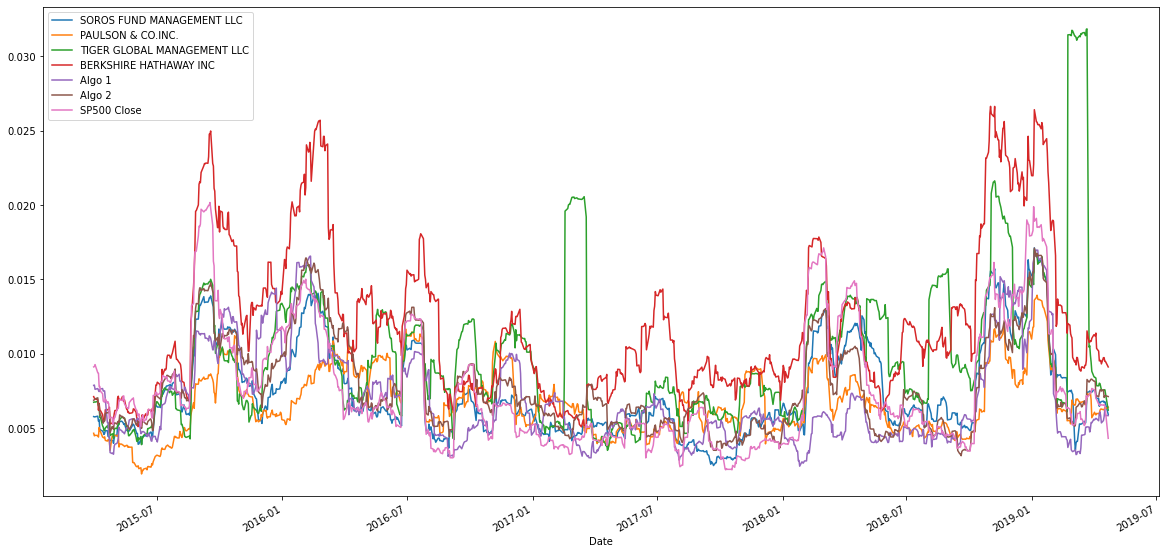

In [174]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# whale_rolling_21 = whale_csv_data.rolling(window=21).std().plot()
# whale_rolling_21

# algo_rolling_21 = algo_csv_data.rolling(window=21).std().plot()
# algo_rolling_21

# sp500_rolling_21 = daily_returns.rolling(window=21).std().plot()
# sp500_rolling_21

# Plot the rolling standard deviation
#plot on one chart

rolling_21 = joined_data_rows.rolling(window=21).std()
rolling_21.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

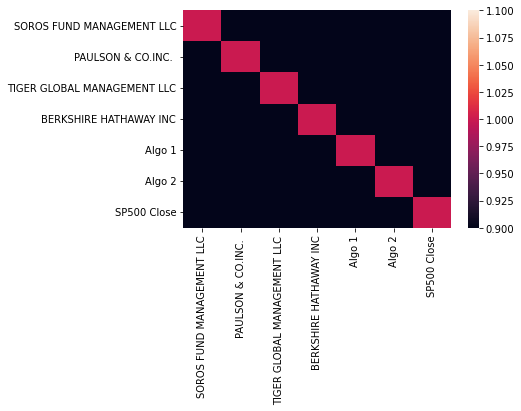

In [175]:
# Calculate the correlation
correlation = rolling_21.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=1, vmax=1)



### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [176]:
# Calculate covariance of a single portfolio

covariance = joined_data_rows['Algo 1'].cov(joined_data_rows['SP500 Close'])
covariance
#rolling 
# Calculate variance of S&P 500
variance = joined_data_rows['SP500 Close'].var()
variance
# Computing beta
algo_beta = covariance / variance
algo_beta
# Plot beta trend
#algo_beta.plot(figsize=(20,10))



-0.03014921454233749

<AxesSubplot:title={'center':'beta trend for algo 1 in relation to S&P 500'}, xlabel='Date'>

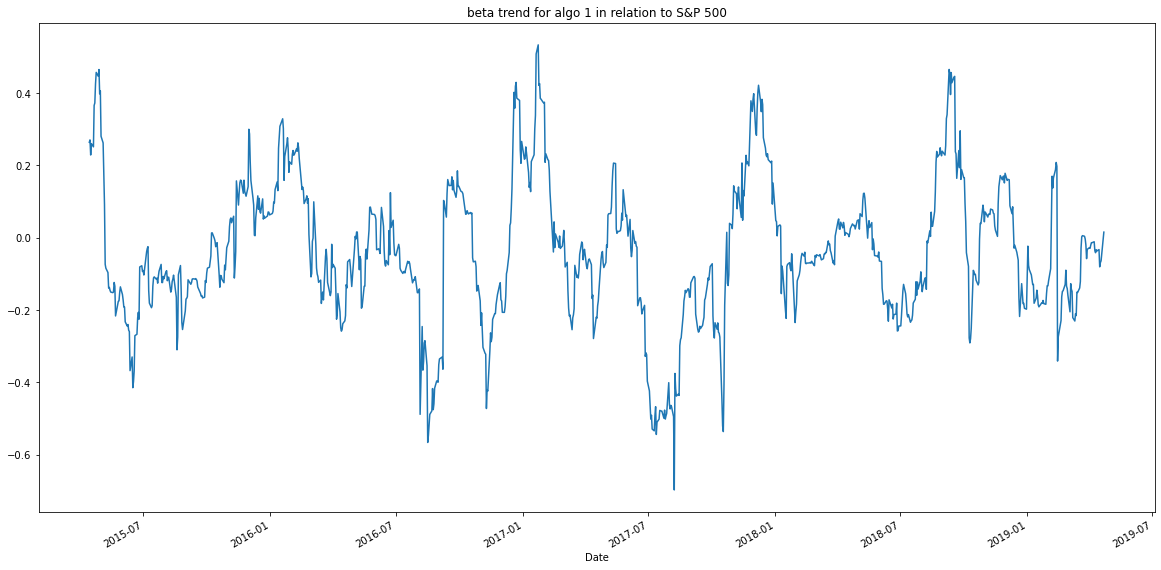

In [177]:
rolling_covar = joined_data_rows['Algo 1'].rolling(window=30).cov(joined_data_rows['SP500 Close'])
rolling_var = joined_data_rows['SP500 Close'].rolling(window=30).var()
roll_beta = rolling_covar / rolling_var
roll_beta.plot(figsize=(20,10), title = "beta trend for algo 1 in relation to S&P 500")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

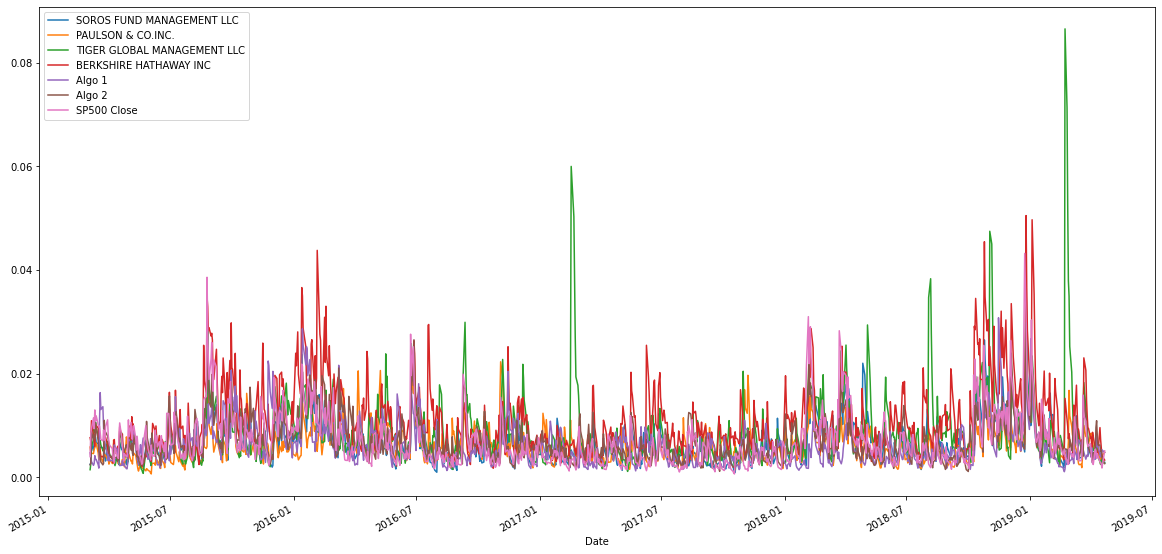

In [178]:
# Use `ewm` to calculate the rolling window
df = joined_data_rows
ewm = df.ewm(halflife=1, adjust=False).std()
ewm.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [179]:
# Annualized Sharpe Ratios
sharpe_ratio = (joined_data_rows.mean() * 252) / (joined_data_rows.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500 Close                   -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

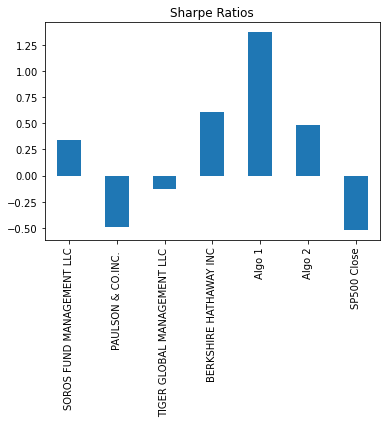

In [180]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [181]:
# Reading data from 1st stock
googl_csv_path = Path("Resources/goog_historical.csv")
googl_csv_path = pd.read_csv(googl_csv_path)
googl_csv_path.set_index(pd.to_datetime(googl_csv_path['Trade DATE'], infer_datetime_format=True), inplace=True)
googl_csv_path.drop(columns = ['Trade DATE'], inplace = True)
googl_csv_path.head()
googl_df = googl_csv_path

In [182]:
# Reading data from 2nd stock
cost_csv_path = Path("Resources/cost_historical.csv")
cost_csv_path = pd.read_csv(cost_csv_path)
cost_csv_path.set_index(pd.to_datetime(cost_csv_path['Trade DATE'], infer_datetime_format=True), inplace=True)
cost_csv_path.drop(columns = ['Trade DATE'], inplace = True)
cost_csv_path.head()
cost_df = cost_csv_path

In [183]:
# Reading data from 3rd stock
aapl_csv_path = Path("Resources/aapl_historical.csv")
aapl_csv_path = pd.read_csv(aapl_csv_path)
aapl_csv_path.set_index(pd.to_datetime(aapl_csv_path['Trade DATE'], infer_datetime_format=True), inplace=True)
aapl_csv_path.drop(columns = ['Trade DATE'], inplace = True)
aapl_csv_path.head()
aapl_df = aapl_csv_path

In [184]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([googl_df, cost_df, aapl_df], axis="rows", join="inner") 
#combined_stocks.index = pd.to_datetime(combined_stocks.index)
combined_stocks

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [185]:
# Reset Date index
comined_stocks = combined_stocks.reset_index()
combined_stocks = combined_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
combined_stocks.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [186]:
# Reorganize portfolio data by having a column per symbol
combined_stocks.columns = ['APPLE', 'COSTCO', 'GOOGLE']
combined_stocks.head()

,APPLE,COSTCO,GOOGLE
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [187]:
# Calculate daily returns

comb_daily_returns = combined_stocks.pct_change()
#comb_daily_returns.head()


# Drop NAs
comb_daily_returns = comb_daily_returns.dropna().copy()


# Display sample data
comb_daily_returns.sample(10)

,APPLE,COSTCO,GOOGLE
Trade DATE,,,
2018-10-19,0.015230,0.004769,0.007804
2018-12-14,-0.031998,-0.085868,-0.018646
2018-07-18,-0.005484,-0.000140,-0.002436
2019-01-28,-0.009255,0.008131,-0.019166
2019-04-23,0.014423,0.008874,0.012580
2018-07-09,0.013885,0.006297,0.012174
2018-09-07,-0.008068,0.020196,-0.005643
2018-09-20,0.007602,0.000299,0.013475
2018-11-23,-0.025399,0.006817,-0.013232


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [188]:
# Set weights
weights = [1/3, 1/3, 1/3]
aapl_weight = 0.33
cost_weight = 0.33
googl_weight = 0.33

# Calculate portfolio return

#portfolio_return = aapl_weight * comb_daily_returns["APPLE"] + cost_weight * comb_daily_returns["COSTCO"] + googl_weight * comb_daily_returns["GOOGLE"]
weighted_portfolio = comb_daily_returns.dot(weights)

# Display sample data
weighted_portfolio.sample()

Trade DATE
2019-03-19    0.002113
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [189]:
# Join your returns DataFrame to the original returns DataFrame
#joined_portfolio_returns = pd.concat([joined_data_rows, combined_stocks], axis="columns", join="inner")
#joined_portfolio_returns

joined_data_rows["MyPortfolio"] = weighted_portfolio
joined_data_rows

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,MyPortfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292


In [190]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_data_rows = joined_data_rows.dropna().copy()
joined_data_rows

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,MyPortfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [191]:
# Calculate the annualized `std`
volatility = joined_data_rows.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.116928
Algo 1                         0.133927
Algo 2                         0.139499
SOROS FUND MANAGEMENT LLC      0.146812
SP500 Close                    0.152469
MyPortfolio                    0.211627
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
dtype: float64

### Calculate and plot rolling `std` with 21-day window

[]

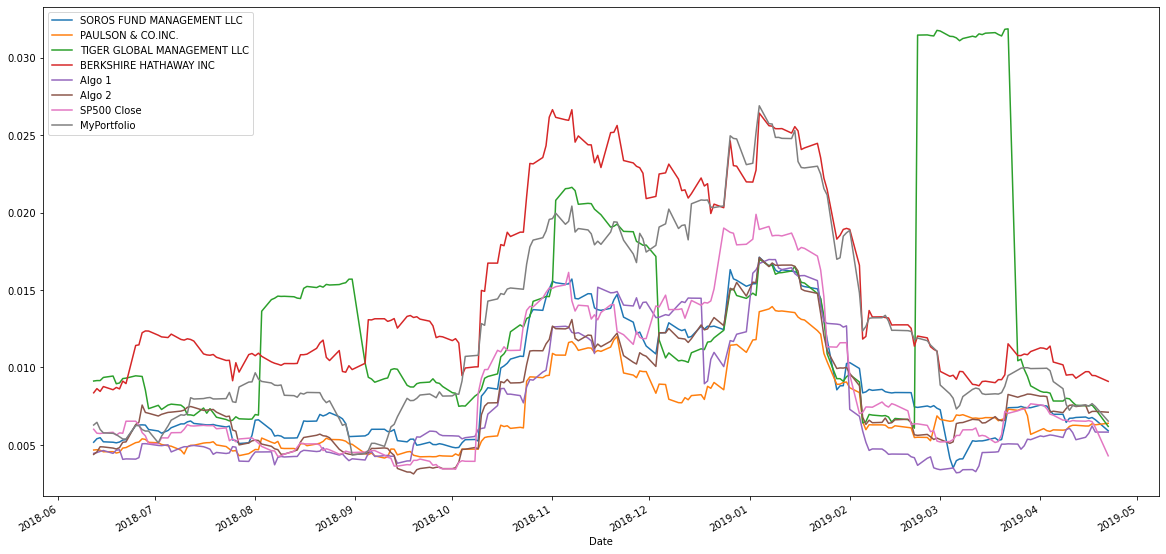

In [192]:
# Calculate rolling standard deviation
rolling_21_std = joined_data_rows.rolling(window=21).std().plot(figsize=(20,10))
# Plot rolling standard deviation
rolling_21_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [194]:
# Calculate and plot the correlation
correlation = rolling_21_std.corr()
correlation
sns.heatmap(correlation, vmin=1, vmax=1)

AttributeError: 'AxesSubplot' object has no attribute 'corr'

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60 Day Beta of Portfolio'}, xlabel='Date'>

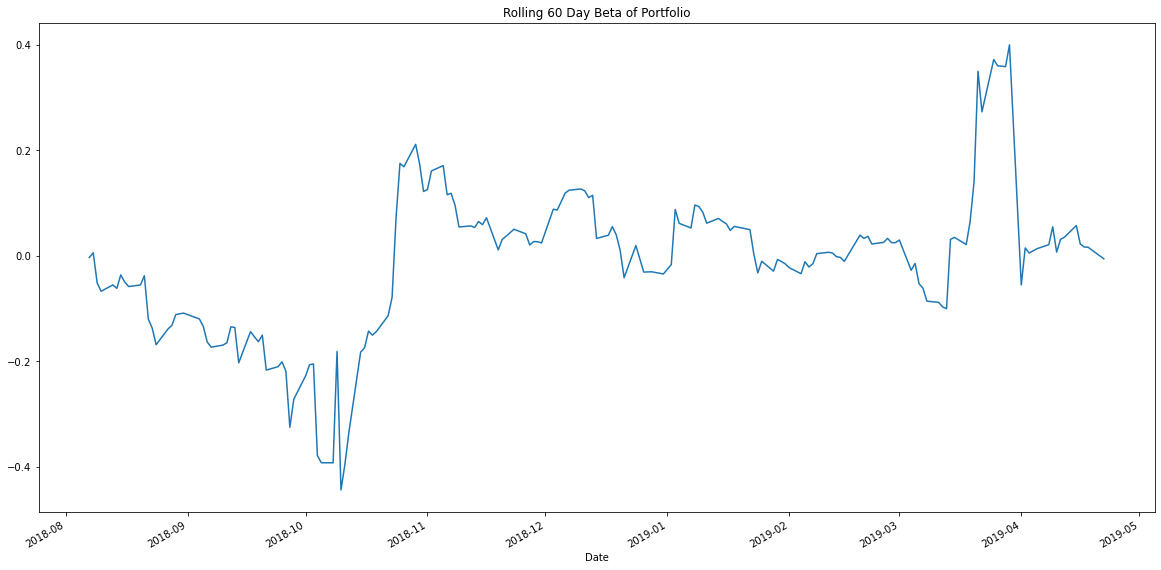

In [195]:
# Calculate and plot 

#need help
rolling_covariance = joined_data_rows["MyPortfolio"].rolling(window=60).cov(joined_data_rows['SP500 Close'])

rolling_variance = joined_data_rows['SP500 Close'].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title="Rolling 60 Day Beta of Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [196]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (joined_data_rows.mean() * 252) / (joined_data_rows.std() * np.sqrt(252))
sharpe_ratio.sort_values(ascending=False)

Algo 1                         2.001260
MyPortfolio                    0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
BERKSHIRE HATHAWAY INC         0.103006
Algo 2                         0.007334
SP500 Close                   -0.427676
TIGER GLOBAL MANAGEMENT LLC   -1.066635
dtype: float64

<AxesSubplot:title={'center':'All Portfolios - Sharpe Ratio'}>

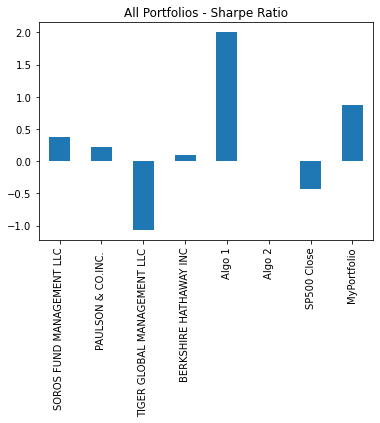

In [197]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="All Portfolios - Sharpe Ratio")

### How does your portfolio do?

Write your answer here!